# **IMPORT MODULES**
---

In [1]:
import numpy as np # useful for many scientific computing in Python
import math
import pandas as pd # primary data structure library # untuk mengolah data

import matplotlib.pyplot as plt
import seaborn as sns # untuk visualisasi data

import requests # untuk akses website yang akan kita scrap atau ambil datanya
from bs4 import BeautifulSoup as bs4 # untuk proses web scrapping jauh lebih mudah
from ast import Pass

# **DATASET**
---

In [3]:
# get data london_crime_by_lsoa.csv
df = pd.read_csv('london_crime_by_lsoa.csv')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


**ABOUT DATASET**

Crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

**Features :**
- **`lsoa_code`**: code for Lower Super Output Area (LSOA) in Greater London.
- **`borough`**: Common name for London borough.
- **`major_category`**: Kategori kejahatan tingkat tinggi
- **`minor_category`**: Kategori kejahatan tingkat rendah dibandingkan dengan major_category
- **`value`**: Jumlah laporan kejahatan yang dilaporkan tiap bulannya di wilayah tertentu
- **`year`**: Year of reported counts, 2008-2016
- **`month`**: Month of reported counts, 1-12

**Dtypes :**
- **`lsoa_code`**: object
- **`borough`**: object
- **`major_category`**: object
- **`minor_category`**: object
- **`value`**: int64
- **`year`**: int64
- **`month`**: int64

cek dtypes -> df.info()

In [12]:
# jumlah missing values
df.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [8]:
df.head(3)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5


# **EXPLORATORY DATA ANALYSIS**
---

In [9]:
crimes3 = df.iloc[:,0:]
crimes3.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [6]:
borough_count = pd.DataFrame(crimes3.groupby('borough').size().sort_values(ascending=False).rename('counts').reset_index())

,borough,counts
0,Croydon,602100
1,Barnet,572832
2,Ealing,549396
3,Bromley,523908
4,Lambeth,519048
5,Enfield,511164
6,Wandsworth,498636
7,Brent,490644
8,Lewisham,485136
9,Southwark,483300


### Question 2: How do the sum of crimes vary by borough ?

## 3. Bar Chart

# **WEB SCRAPPING**

So, to scrap the longitude and latitude of Boroughs from the Wikipedia page we’ll use Beautiful Soup.

In [8]:
#using beautiful soup to parse the XML code.
wikipedia_page = requests.get("https://www.wikiwand.com/en/List_of_London_boroughs").text
soup = bs4(wikipedia_page,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="minimum-scale=1, initial-scale=1, width=device-width, shrink-to-fit=no, user-scalable=no, viewport-fit=cover" name="viewport"/>
  <title>
   List of London boroughs - Wikiwand
  </title>
  <meta content="List of boroughs in Greater London" name="description"/>
  <meta content="website" property="og:type"/>
  <meta content="Wikiwand - List of London boroughs" property="og:title"/>
  <meta content="List of boroughs in Greater London" property="og:description"/>
  <meta content="https://wikiwand.com/en/List_of_London_boroughs" property="og:url"/>
  <meta property="og:image"/>
  <meta content="summary" name="twitter:card"/>
  <meta content="https://wikiwand.com/en/List_of_London_boroughs" name="twitter:url"/>
  <meta content="Wikiwand - List of London boroughs" name="twitter:title"/>
  <meta content="List of boroughs in Greater London" name="twitter:description"/>
  <meta name="twitter:image"/>
  <script>
   function

The table which contains additional details of neighborhoods is also scrapped and converted to the data frame.

In [26]:
#extracting the table from webpage
table = soup.find('table_wrapper scroll',{'class':'wikitable sortable jquery-tablesorter'})
#converting table to dataframe
London_table = pd.read_html(str(table[0]), index_col=None, header=0)[0]
London_table.head()

TypeError: 'NoneType' object is not subscriptable

# **VISUALIZATION**

In [11]:
crime2 = pd.read_csv("london_crime_by_lsoa.csv")
#taking recent year - 2016
crime2.drop(crime2.index[crime2['year']!=2016],inplace=True)
#Removing all entries where crime value is null
crime2=crime2[crime2.value!=0]
#reset index & dropping previous one
crime2=crime2.reset_index(drop=True)

Let’s do some preprocessing stuff before proceeding further.

In [12]:
# change the column names
crime2.columns =['LSOA_Code','Borough','Major_Category','Minor_Category','No_of_Crimes','Year','Month']
# pivoting the table to view the no. of crimes
# for each major category in each Borough
London_crime = pd.pivot_table(crime2, values=['No_of_Crimes'],
                             index=['Borough'],
                             columns=['Major_Category'],
                             aggfunc=np.sum,fill_value=0)
                             #total crimes per borough
London_crime['Total']=London_crime.sum(axis=1)
London_crime.head()

No_of_Crimes                        \
Major_Category           Burglary Criminal Damage Drugs   
Borough                                                   
Barking and Dagenham         1287            1949   919   
Barnet                       3402            2183   906   
Bexley                       1123            1673   646   
Brent                        2631            2280  2096   
Bromley                      2214            2202   728   

                                                                           \
Major_Category       Other Notifiable Offences Robbery Theft and Handling   
Borough                                                                     
Barking and Dagenham                       378     534               5607   
Barnet                                     499     464               9731   
Bexley                                     294     209               4392   
Brent                                      536     919               9026   
Bromley                                    417     369               7584   

                                                  Total  
Major_Category       Violence Against the Person         
Borough                                                  
Barking and Dagenham                        6067  16741  
Barnet                                      7499  24684  
Bexley                                      4503  12840  
Brent                                       9205  26693  
Bromley                                     6650  20164

In [ ]:
#combining both dataframes
final_crime = pd.merge(London_crime, London_table, on='Borough')
final_crime.head()

NameError: name 'London_table' is not defined

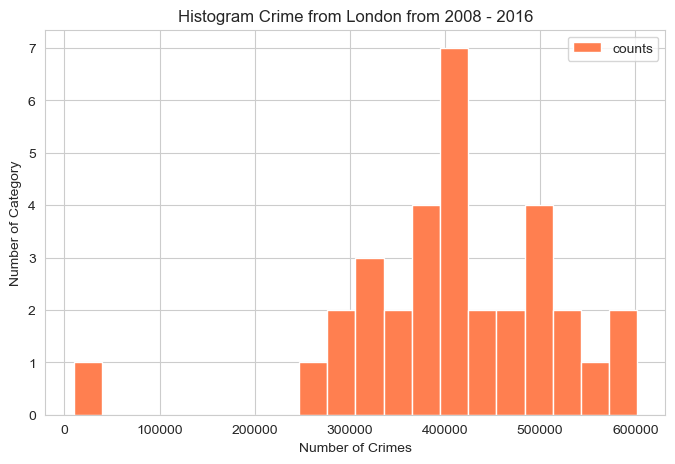

In [ ]:
borough_count.plot(kind='hist',
                    figsize=(8, 5),
                    bins=20,
                    color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title("Histogram of Crime from 32 borough in London from 2008 - 2016")
plt.ylabel("Number of Category")
plt.xlabel("Number of Crimes")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


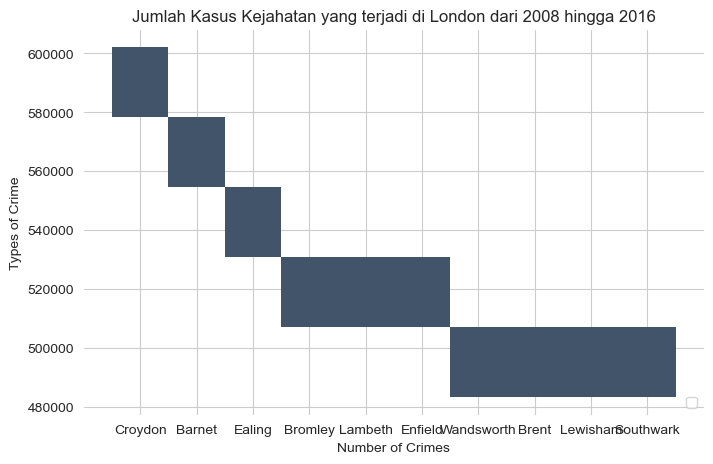

In [ ]:
# Define the matplotlib figure size
f, ax = plt.subplots(figsize=(8, 5))
sns.set_style("whitegrid")

# Plot the total crashes
sns.set_color_codes("pastel")
sns.histplot(x="borough",
            y="counts",
            data=borough_count.iloc[:10, :],
            label="Total",
            color="b")

# Buat nampilin barplot/label/keterangan 'Total'. Posisi di kanan bawah
ax.legend(ncol=2, loc="lower right", frameon=True)

#
ax.set(title="Jumlah Kasus Kejahatan yang terjadi di London dari 2008 hingga 2016",
       ylabel="Types of Crime",
       xlabel="Number of Crimes")
sns.despine(left=True, bottom=True)


# Add a legend and informative axis label
plt.show()

In [ ]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns

#### Question 3: Which number of major category of crime are most in London ?

Using artist layer and the crimes3 dataset, create a vertical bar plot showing the total number of crimes in London from major_category, for the period 2008-2016. Label each types of crime with the total.

    Step 1: Dapatkan dataset yang berkaitan dengan banyak kasus kejahatan yang terjadi di London. Buat dataframe crimes_count untuk mengurutkan jenis kejahatan tertinggi berdasarkan laporan terbanyak dari tahun 2008 hingga 2016.

In [ ]:
# create crime_count dataframe by grouping major category column
# column of crimes3 dataframe
crime_count = pd.DataFrame(crimes3.groupby('major_category').size().sort_values(ascending=False).rename('counts').reset_index())
crime_count

,major_category,counts
0,Theft and Handling,3966300
1,Violence Against the Person,3171744
2,Criminal Damage,2069172
3,Drugs,1179468
4,Burglary,1043604
5,Robbery,939384
6,Other Notifiable Offences,776304
7,Fraud or Forgery,236520
8,Sexual Offences,108108


Penjelasan :
- CL_top5 (Top 5 Crimes in London)
- size diatas
- reset_index diatas untuk nambahin index tiap baris
- rename diatas untuk nambahin kolom 'counts'
- sort_values diatas untuk mengurutkan kolom 'counts'

    Step 2: Plot the Bar charts

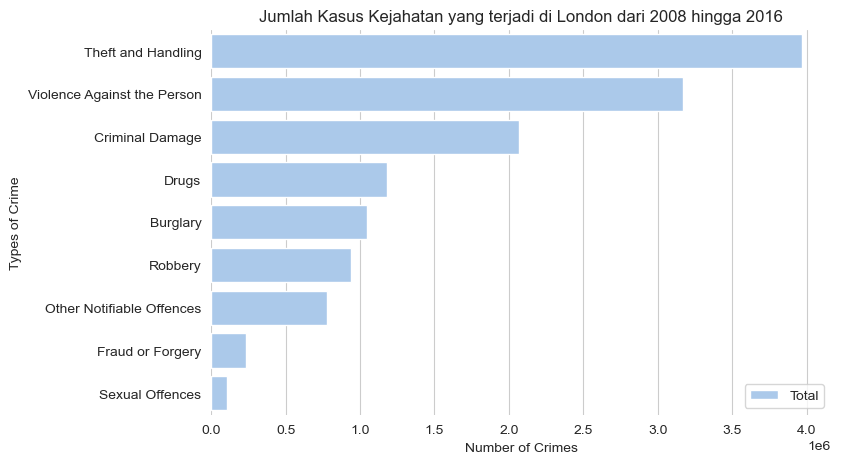

In [ ]:
# Define the matplotlib figure size
f, ax = plt.subplots(figsize=(8, 5))
sns.set_style("whitegrid")

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="counts",
            y="major_category",
            data=crime_count.iloc[:10, :],
            label="Total",
            color="b")

# Buat nampilin barplot/label/keterangan 'Total'. Posisi di kanan bawah
ax.legend(ncol=2, loc="lower right", frameon=True)

#
ax.set(title="Jumlah Kasus Kejahatan yang terjadi di London dari 2008 hingga 2016",
       ylabel="Types of Crime",
       xlabel="Number of Crimes")
sns.despine(left=True, bottom=True)

# Add a legend and informative axis label
plt.show()

Berdasarkan bar chart diatas, jumlah tertinggi kasus kejahatan di London adalah Theft and Handling, sedangkan posisi kedua diisi oleh Violence against the person.